In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Salary_glassdoor_cleaned.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_sal,max_sal,company_name,job_state,python_yn,R_yn,spark_yn,aws_yn,excel_yn,company_age
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,Tecolote Research\n,NM,1,0,0,0,1,47
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,University of Maryland Medical System\n,MD,1,0,0,0,0,36
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,KnowBe4\n,FL,1,1,1,0,1,10
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,PNNL\n,WA,1,0,0,0,0,55
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,Affinity Solutions\n,NY,1,0,0,0,1,22


In [4]:
df.shape

(742, 26)

In [5]:
pd.set_option('display.max_rows', None)
df['Job Title'].value_counts()

Data Scientist                                                                                        131
Data Engineer                                                                                          53
Senior Data Scientist                                                                                  34
Data Analyst                                                                                           15
Senior Data Engineer                                                                                   14
Senior Data Analyst                                                                                    12
Lead Data Scientist                                                                                     8
Marketing Data Analyst                                                                                  6
Sr. Data Engineer                                                                                       6
Machine Learning Engineer                     

In [6]:
# Define Function
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    if 'data engineer' in title.lower():
        return 'data engineer'
    if 'analyst' in title.lower():
        return 'data analyst'
    if 'specialist' in title.lower():
        return 'data specialist'
    if 'director' in title.lower():
        return 'director'
    if 'data scientist' in title.lower():
        return 'data scientist'
    if 'manager' in title.lower():
        return 'manager'
    if 'machine learning' in title.lower():
        return 'ml'     

In [7]:
# senior and junior level
def seniority(title):
    if 'senior' in title.lower() or'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'head' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or'jr' in title.lower() or 'associate' in title.lower() or 'executive' in title.lower() or 'intern' in title.lower():
        return 'junior'
    else:
        return 'Sr or Jr level n/a'

In [8]:
df['job_tile']=df['Job Title'].apply(title_simplifier)

In [9]:
#df['job_tile'].head(50)

In [10]:
df['seniority']=df['Job Title'].apply(seniority)

In [11]:
df['seniority'].head(50)

0     Sr or Jr level n/a
1     Sr or Jr level n/a
2     Sr or Jr level n/a
3     Sr or Jr level n/a
4     Sr or Jr level n/a
5     Sr or Jr level n/a
6     Sr or Jr level n/a
7     Sr or Jr level n/a
8     Sr or Jr level n/a
9     Sr or Jr level n/a
10    Sr or Jr level n/a
11    Sr or Jr level n/a
12    Sr or Jr level n/a
13    Sr or Jr level n/a
14    Sr or Jr level n/a
15    Sr or Jr level n/a
16    Sr or Jr level n/a
17    Sr or Jr level n/a
18    Sr or Jr level n/a
19    Sr or Jr level n/a
20    Sr or Jr level n/a
21                senior
22    Sr or Jr level n/a
23    Sr or Jr level n/a
24    Sr or Jr level n/a
25    Sr or Jr level n/a
26    Sr or Jr level n/a
27                junior
28    Sr or Jr level n/a
29    Sr or Jr level n/a
30    Sr or Jr level n/a
31    Sr or Jr level n/a
32    Sr or Jr level n/a
33    Sr or Jr level n/a
34    Sr or Jr level n/a
35    Sr or Jr level n/a
36    Sr or Jr level n/a
37    Sr or Jr level n/a
38                senior
39    Sr or Jr level n/a


In [12]:
df['job_tile']

0       data scientist
1       data scientist
2       data scientist
3       data scientist
4       data scientist
5       data scientist
6       data scientist
7       data scientist
8                 None
9       data scientist
10      data scientist
11      data scientist
12      data scientist
13        data analyst
14      data scientist
15       data engineer
16                None
17      data scientist
18      data scientist
19      data scientist
20      data scientist
21      data scientist
22      data scientist
23      data scientist
24      data scientist
25      data scientist
26      data scientist
27        data analyst
28      data scientist
29      data scientist
30      data scientist
31      data scientist
32      data scientist
33      data scientist
34      data scientist
35        data analyst
36      data scientist
37      data scientist
38      data scientist
39       data engineer
40        data analyst
41       data engineer
42      data scientist
43         

In [13]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_sal,max_sal,company_name,job_state,python_yn,R_yn,spark_yn,aws_yn,excel_yn,company_age,job_tile,seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,Tecolote Research\n,NM,1,0,0,0,1,47,data scientist,Sr or Jr level n/a
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,University of Maryland Medical System\n,MD,1,0,0,0,0,36,data scientist,Sr or Jr level n/a
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,KnowBe4\n,FL,1,1,1,0,1,10,data scientist,Sr or Jr level n/a
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,PNNL\n,WA,1,0,0,0,0,55,data scientist,Sr or Jr level n/a
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,Affinity Solutions\n,NY,1,0,0,0,1,22,data scientist,Sr or Jr level n/a


In [14]:
df['job_state'].value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 UT              10
 WI              10
 IN              10
 AZ               9
 MO               9
 AL               8
 KY               6
 DE               6
 GA               6
 MI               6
 CT               5
 IA               5
 NE               4
 OR               4
 LA               4
 NM               3
 KS               3
 MN               2
 ID               2
 RI               1
 SC               1
 Los Angeles      1
Name: job_state, dtype: int64

In [15]:
df['Competitors'].value_counts()

-1                                                                                              460
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
Battelle, General Atomics, SAIC                                                                   8
Expedia Group, Orbitz Worldwide, Priceline.com                                                    7
FLURRY, Chartboost                                                                                6
Pitney Bowes                                                                                      6
Leidos, CACI International, Booz Allen Hamilton                                                   6


In [16]:
df['num_comp']=df['Competitors'].apply(lambda x: len(x.split(',')) if x!= -1 else 0 )

In [17]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_sal,max_sal,company_name,job_state,python_yn,R_yn,spark_yn,aws_yn,excel_yn,company_age,job_tile,seniority,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,Tecolote Research\n,NM,1,0,0,0,1,47,data scientist,Sr or Jr level n/a,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,University of Maryland Medical System\n,MD,1,0,0,0,0,36,data scientist,Sr or Jr level n/a,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,KnowBe4\n,FL,1,1,1,0,1,10,data scientist,Sr or Jr level n/a,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,PNNL\n,WA,1,0,0,0,0,55,data scientist,Sr or Jr level n/a,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,Affinity Solutions\n,NY,1,0,0,0,1,22,data scientist,Sr or Jr level n/a,3


In [18]:
df[df['hourly']==1].head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_sal,max_sal,company_name,job_state,python_yn,R_yn,spark_yn,aws_yn,excel_yn,company_age,job_tile,seniority,num_comp
165,Medical Lab Scientist,$17-$24 Per Hour(Glassdoor est.),Overview\n\nAbout\n\n\nTower Health is a stron...,3.6,Tower Health\n3.6,"West Reading, PA","Reading, PA",5001 to 10000 employees,2017,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,1,0,17,24,Tower Health\n,PA,0,0,0,0,0,3,None,Sr or Jr level n/a,1
177,MED TECH/LAB SCIENTIST - LABORATORY,$21-$34 Per Hour(Glassdoor est.),Evening: 3P-1130P or Night Shift 11P-730A\n\nI...,3.6,Beebe Healthcare\n3.6,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,1,0,21,34,Beebe Healthcare\n,DE,0,0,0,0,0,85,None,Sr or Jr level n/a,1
197,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),-1,1,0,18,25,Texas Health Huguley Hospital\n,TX,0,0,0,1,0,43,None,Sr or Jr level n/a,1
202,MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB,$21-$34 Per Hour(Glassdoor est.),Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare\n3.6,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,1,0,21,34,Beebe Healthcare\n,DE,0,0,0,0,0,85,None,Sr or Jr level n/a,1
210,Medical Technologist / Clinical Laboratory Sci...,$15-$25 Per Hour(Glassdoor est.),The incumbent performs a broad range of labora...,3.4,"Veterans Affairs, Veterans Health Administrati...","New Orleans, LA","Washington, DC",10000+ employees,1930,Government,Federal Agencies,Government,Unknown / Non-Applicable,-1,1,0,15,25,"Veterans Affairs, Veterans Health Administrati...",LA,0,0,0,0,0,90,None,Sr or Jr level n/a,1


2.016 multiply min and max sal col  Ref to convert hourly sal to annualy in thousands- =($1*8*21*12)/1000

In [21]:
df['min_sal']=df.apply(lambda x:x['min_sal'] if x['hourly']==0 else x['min_sal']*2.016, axis=1)

In [24]:
df.tail(100)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_sal,max_sal,company_name,job_state,python_yn,R_yn,spark_yn,aws_yn,excel_yn,company_age,job_tile,seniority,num_comp
642,Sr. Data Analyst,$50K-$89K (Glassdoor est.),Position Overview:\n\nThe Sr. Data Analyst pla...,3.7,Community Behavioral Health\n3.7,"Philadelphia, PA","Phila, PA",201 to 500 employees,1994,Company - Private,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,0,0,50.000,89,Community Behavioral Health\n,PA,0,0,0,0,1,26,data analyst,senior,1
643,"Senior Engineer, Data Management Engineering",$68K-$129K (Glassdoor est.),Western Digital®\n\n\nThe next big thing in da...,3.5,Western Digital\n3.5,"Milpitas, CA","San Jose, CA",10000+ employees,1970,Company - Public,Computer Hardware & Software,Information Technology,$10+ billion (USD),"Seagate Technology, Toshiba",0,0,68.000,129,Western Digital\n,CA,1,0,1,1,0,50,None,senior,2
644,Quality Control Scientist III- Analytical Deve...,$48K-$113K (Glassdoor est.),The primary role of this position is to apply ...,2.7,Advanced BioScience Laboratories\n2.7,"Rockville, MD","Rockville, MD",201 to 500 employees,1961,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$25 to $50 million (USD),-1,0,0,48.000,113,Advanced BioScience Laboratories\n,MD,0,0,0,0,1,59,None,Sr or Jr level n/a,1
645,"Clinical Scientist, Clinical Development",$27-$47 Per Hour(Glassdoor est.),Job Summary:\n\nThis position reports to the D...,3.8,FORMA THERAPEUTICS\n3.8,"Watertown, MA","Watertown, MA",51 to 200 employees,2008,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $25 million (USD),-1,1,0,54.432,47,FORMA THERAPEUTICS\n,MA,0,0,0,0,1,12,None,Sr or Jr level n/a,1
646,Software Engineer Staff Scientist: Human Langu...,$74K-$124K (Glassdoor est.),"Are you an experienced, passionate pioneer in ...",3.7,Raytheon\n3.7,"Cambridge, MD","Waltham, MA",10000+ employees,1922,Company - Public,Aerospace & Defense,Aerospace & Defense,$10+ billion (USD),-1,0,0,74.000,124,Raytheon\n,MD,1,0,0,0,0,98,None,Sr or Jr level n/a,1
647,"Manager, Safety Scientist, Medical Safety & Ri...",$68K-$125K (Glassdoor est.),"Manager, Safety Scientist, Medical Safety & Ri...",3.8,Agios Pharmaceuticals\n3.8,"Cambridge, MA","Cambridge, MA",501 to 1000 employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$50 to $100 million (USD),-1,0,0,68.000,125,Agios Pharmaceuticals\n,MA,0,0,0,0,1,12,manager,Sr or Jr level n/a,1
648,"Assistant Director/Director, Office of Data Sc...",$39K-$67K (Glassdoor est.),Advance your career at Liberty Mutual - A Fort...,3.3,Liberty Mutual Insurance\n3.3,"Boston, MA","Boston, MA",10000+ employees,1912,Company - Private,Insurance Carriers,Insurance,$10+ billion (USD),"Travelers, Allstate, State Farm",0,0,39.000,67,Liberty Mutual Insurance\n,MA,0,0,0,0,0,108,director,Sr or Jr level n/a,3
649,Sr. Data Engineer | Big Data SaaS Pipeline,$71K-$135K (Glassdoor est.),Sr. Data Engineer\n\nWe are growing!!\n\nBridg...,2.7,Bridg\n2.7,"Los Angeles, CA","Los Angeles, CA",1 to 50 employees,2011,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,0,0,71.000,135,Bridg\n,CA,0,0,1,1,0,9,data engineer,senior,1
650,Senior Risk Data Scientist,$107K-$172K (Glassdoor est.),About Bill.com\n\nBill.com is a leading provid...,3.8,Bill.com\n3.8,"Palo Alto, CA","Palo Alto, CA",501 to 1000 employees,2006,Company - Public,Financial Transaction Processing,Finance,$50 to $100 million (USD),-1,0,0,107.000,172,Bill.com\n,CA,0,0,0,0,0,14,data scientist,senior,1
651,Data Scientist in Artificial Intelligence Earl...,$49K-$85K (Glassdoor est.),*Organization and Job ID**\nJob ID:\n\nDirecto...,3.8,Pacific Northwest National Laboratory\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, 

In [30]:
df['max_sal']=df.apply(lambda x:x['max_sal'] if x['hourly']==0 else x['max_sal']*2.016, axis=1)

In [31]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_sal,max_sal,company_name,job_state,python_yn,R_yn,spark_yn,aws_yn,excel_yn,company_age,job_tile,seniority,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53.0,91.0,Tecolote Research\n,NM,1,0,0,0,1,47,data scientist,Sr or Jr level n/a,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63.0,112.0,University of Maryland Medical System\n,MD,1,0,0,0,0,36,data scientist,Sr or Jr level n/a,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80.0,90.0,KnowBe4\n,FL,1,1,1,0,1,10,data scientist,Sr or Jr level n/a,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56.0,97.0,PNNL\n,WA,1,0,0,0,0,55,data scientist,Sr or Jr level n/a,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86.0,143.0,Affinity Solutions\n,NY,1,0,0,0,1,22,data scientist,Sr or Jr level n/a,3


In [32]:
df['avg_salary']=(df['min_sal'] + df['max_sal'])/2

In [33]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_sal,max_sal,company_name,job_state,python_yn,R_yn,spark_yn,aws_yn,excel_yn,company_age,job_tile,seniority,num_comp,avg_salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53.0,91.0,Tecolote Research\n,NM,1,0,0,0,1,47,data scientist,Sr or Jr level n/a,1,72.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63.0,112.0,University of Maryland Medical System\n,MD,1,0,0,0,0,36,data scientist,Sr or Jr level n/a,1,87.5
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80.0,90.0,KnowBe4\n,FL,1,1,1,0,1,10,data scientist,Sr or Jr level n/a,1,85.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56.0,97.0,PNNL\n,WA,1,0,0,0,0,55,data scientist,Sr or Jr level n/a,3,76.5
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86.0,143.0,Affinity Solutions\n,NY,1,0,0,0,1,22,data scientist,Sr or Jr level n/a,3,114.5


In [34]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_sal', 'max_sal', 'company_name',
       'job_state', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'company_age', 'job_tile', 'seniority', 'num_comp', 'avg_salary'],
      dtype='object')

<AxesSubplot:>

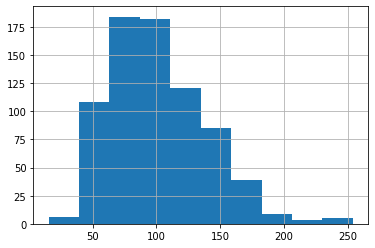

In [35]:
df.avg_salary.hist()

<AxesSubplot:>

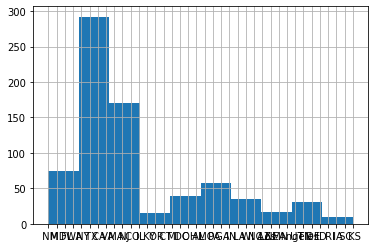

In [36]:
df.job_state.hist()

<AxesSubplot:>

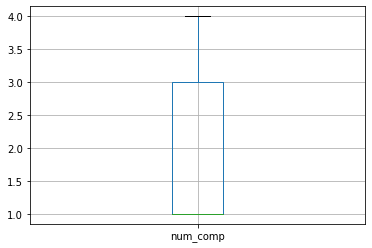

In [37]:
df.boxplot(column=['num_comp'])

<AxesSubplot:>

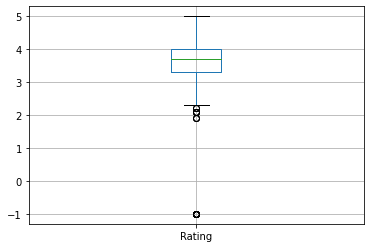

In [38]:
df.boxplot(column=['Rating'])

In [ ]:
# Replace outlier in Rating with mean

In [39]:
df.corr()

,Rating,Founded,hourly,employer_provided,min_sal,max_sal,python_yn,R_yn,spark_yn,aws_yn,excel_yn,company_age,num_comp,avg_salary
Rating,1.000000,0.332927,-0.019531,-0.468234,-0.009601,0.027336,0.144665,0.043790,0.156982,0.117049,-0.036466,0.018630,0.021395,0.012499
Founded,0.332927,1.000000,0.049313,-0.312761,-0.033921,0.006870,0.103183,0.001126,0.066978,-0.011123,-0.035567,0.125678,0.186463,-0.009859
hourly,-0.019531,0.049313,1.000000,0.124748,-0.201787,-0.274994,-0.193487,-0.070901,-0.098530,-0.030315,-0.099897,0.007183,-0.117629,-0.248852
employer_provided,-0.468234,-0.312761,0.124748,1.000000,0.187955,0.029024,-0.107924,-0.059383,-0.082524,-0.000685,0.074129,-0.106553,-0.112424,0.095029
min_sal,-0.009601,-0.033921,-0.201787,0.187955,1.000000,0.940078,0.326669,0.117964,0.164548,0.168883,-0.075443,0.003448,0.069774,0.978696
max_sal,0.027336,0.006870,-0.274994,0.029024,0.940078,1.000000,0.301267,0.106569,0.171217,0.170916,-0.067409,0.034419,0.081448,0.990055
python_yn,0.144665,0.103183,-0.193487,-0.107924,0.326669,0.301267,1.000000,0.198253,0.347619,0.203221,-0.021519,-0.100224,0.078975,0.316201
R_yn,0.043790,0.001126,-0.070901,-0.059383,0.117964,0.106569,0.198253,1.000000,0.001613,-0.009475,0.130290,0.070343,-0.023364,0.112845
spark_yn,0.156982,0.066978,-0.098530,-0.082524,0.164548,0.171217,0.347619,0.001613,1.000000,0.298822,-0.047334,-0.103525,0.054379,0.170995
aws_yn,0.117049,-0.011123,-0.030315,-0.000685,0.168883,0.170916,0.203221,-0.009475,0.298822,1.000000,-0.019235,-0.033019,-0.022778,0.172603


In [40]:
import matplotlib.pyplot as plt
%matplotlib.inline

<AxesSubplot:>

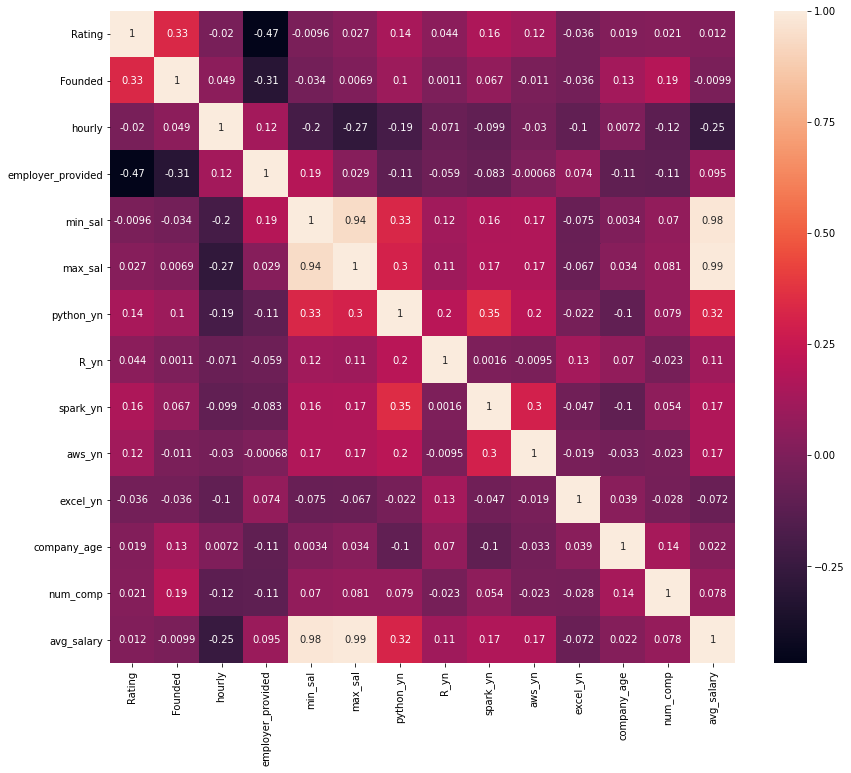

In [45]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True)

In [ ]:
#sns.pairplot(df)

In [49]:
df_cat= df[['Location', 'Headquarters', 'Type of ownership', 'Industry', 'Sector', 'Revenue']]

In [56]:
df_cat['Location'].value_counts()

New York, NY                         55
San Francisco, CA                    49
Cambridge, MA                        47
Chicago, IL                          32
Boston, MA                           23
San Jose, CA                         13
Pittsburgh, PA                       12
Rockville, MD                        11
Washington, DC                       11
Richland, WA                         10
Winston-Salem, NC                    10
Herndon, VA                          10
Indianapolis, IN                      9
San Diego, CA                         9
Austin, TX                            8
South San Francisco, CA               8
Mountain View, CA                     8
Palo Alto, CA                         7
Rochester, NY                         7
Phoenix, AZ                           6
Gaithersburg, MD                      6
Huntsville, AL                        6
Charlotte, NC                         6
Dallas, TX                            6
Marlborough, MA                       6


Location 200


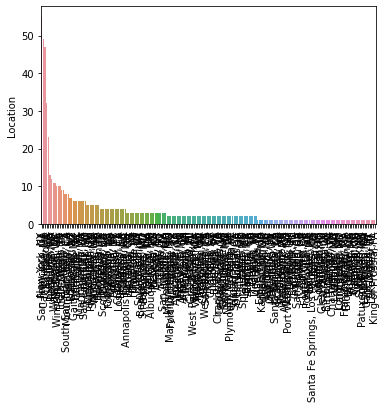

Headquarters 198


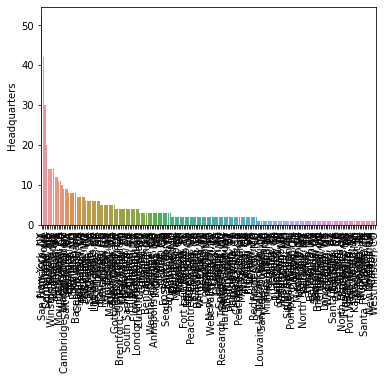

Type of ownership 11


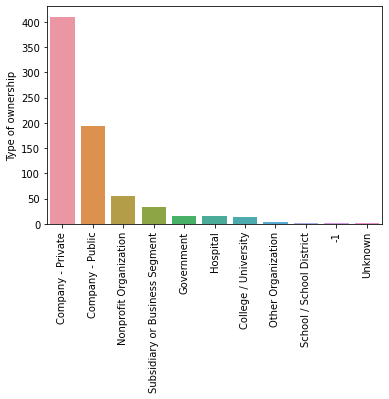

Industry 60


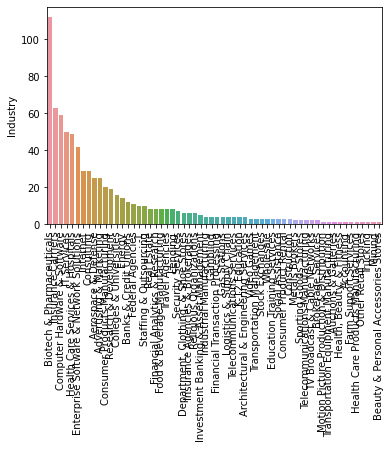

Sector 25


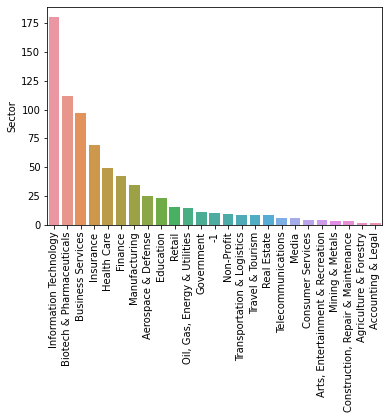

Revenue 14


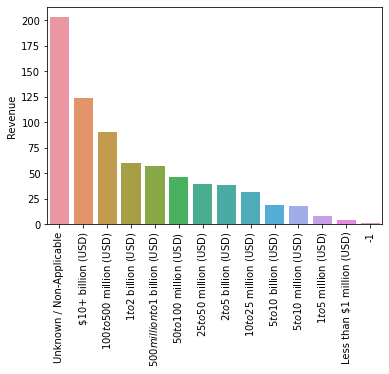

In [54]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    
    print(i, len(cat_num))
    plot=sns.barplot(x=cat_num.index, y=cat_num)
    plt.setp(plot.get_xticklabels(), rotation=90)
    plt.show()

In [58]:
pd.pivot_table(df,index=['job_tile','seniority'], values='avg_salary')

avg_salary
job_tile        seniority                     
data analyst    Sr or Jr level n/a   62.939394
                junior               47.555556
                senior               80.108593
data engineer   Sr or Jr level n/a   95.259740
                junior              118.900000
                senior              124.689189
data scientist  Sr or Jr level n/a  107.538251
                junior               84.250000
                senior              138.956522
data specialist Sr or Jr level n/a   51.600000
director        Sr or Jr level n/a  173.375000
                junior              140.000000
manager         Sr or Jr level n/a   84.022727
ml              Sr or Jr level n/a  119.133333
                senior              142.071429

In [57]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_sal', 'max_sal', 'company_name',
       'job_state', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'company_age', 'job_tile', 'seniority', 'num_comp', 'avg_salary'],
      dtype='object')

In [59]:
df.to_csv('eda_data.csv')

In [60]:
df=pd.read_csv('glassdoor_jobs.csv')

In [61]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [ ]:
# Dtale library for EDA  # pandas profiling

# Pycaret for model building

!pip install dtale

In [62]:
import dtale

In [63]:
df_cleaned=dtale.show(df)

C:\Users\Shrikant Agrawal\Anaconda3\lib\site-packages\dtale\views.py:1723: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Shrikant Agrawal\Anaconda3\lib\site-packages\dtale\views.py:1723: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Shrikant Agrawal\Anaconda3\lib\site-packages\dtale\views.py:1723: FutureWarning:

The default value of regex will change from True to False in a future version.

